In [1]:
# Importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data 
df= pd.read_csv(r"C:\Users\BAPS\Documents\Python Scripts\ML\Assignment\diabetes.csv")

In [3]:
# Checking how our data looks like
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Checking shape of data
df.shape

(768, 9)

In [6]:
# Checking the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Checking Duplicate values
df.duplicated().sum()

0

Good News! Our data does not contains any null or duplicated values.

In [8]:
# Checking the data type of our features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Our target variable is Outcome. Checking the details
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
for i in df.columns[:-1]:
    print(f"Unique values in {i}")
    print(df[i].nunique())
    print("*"*40)

Unique values in Pregnancies
17
****************************************
Unique values in Glucose
136
****************************************
Unique values in BloodPressure
47
****************************************
Unique values in SkinThickness
51
****************************************
Unique values in Insulin
186
****************************************
Unique values in BMI
248
****************************************
Unique values in DiabetesPedigreeFunction
517
****************************************
Unique values in Age
52
****************************************


In [11]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

### EDA

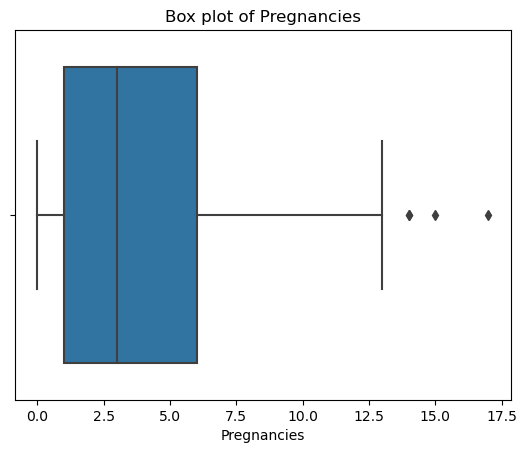

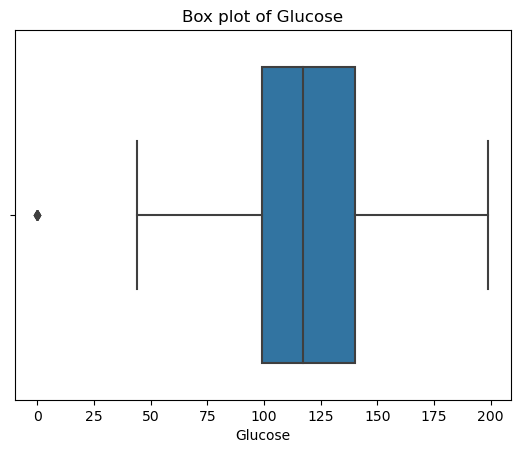

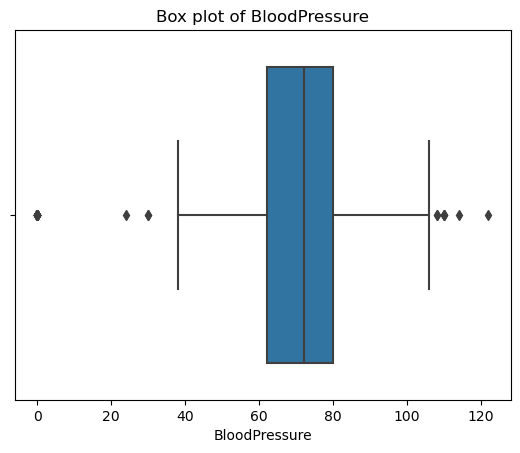

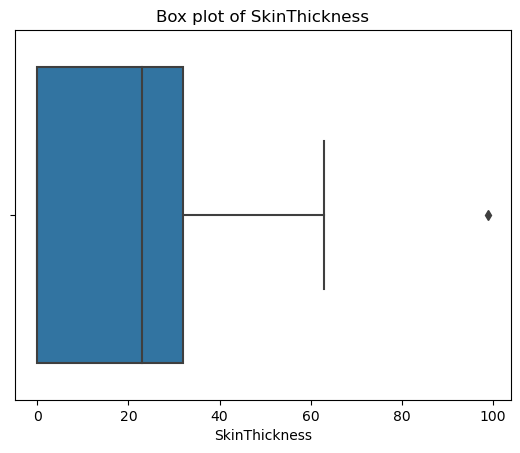

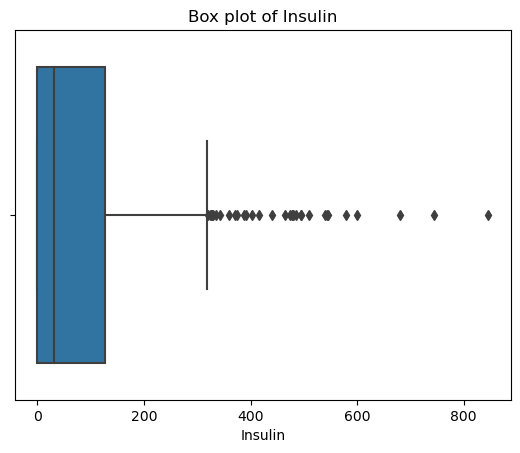

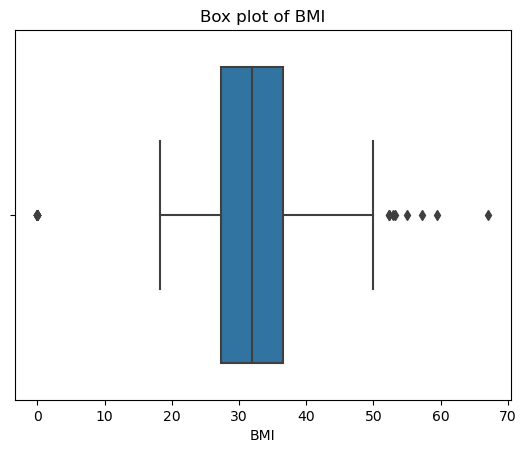

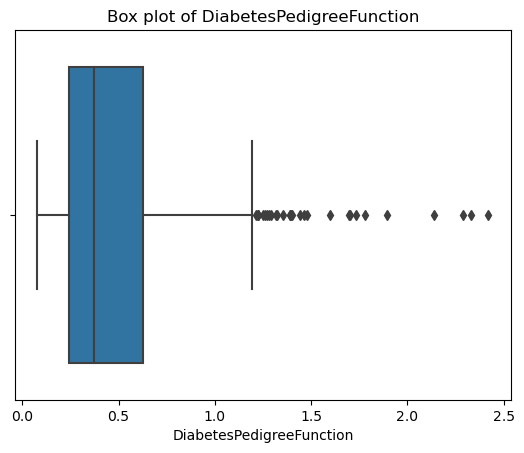

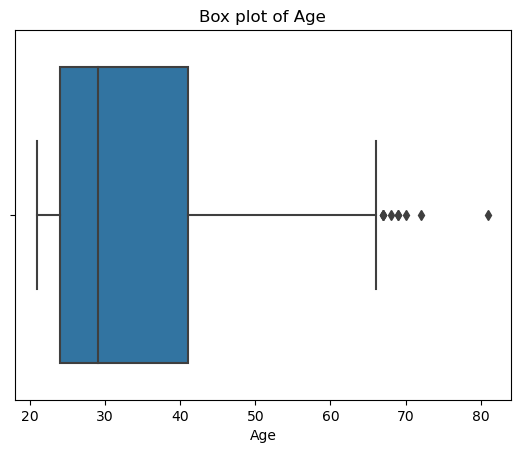

In [12]:
for i in df.columns[:-1]:
    sns.boxplot(x=df[i])
    plt.title(f"Box plot of {i}")
    plt.show()

#### Outliers are present in
<pre>
1) Pregnancies has outliers beyond Q3.
2) Glucose has outliers beyond Q1.
3) BP has outliers beyond Q1 and beyond Q3.
4) SkinThickness has outliers beyond Q3.
5) Insulin  and DPFun has major outliers beyond Q3
6) BMI has outliers beyond Q1 and beyond Q3.
7) Age has outliers beyond Q3.
</pre>

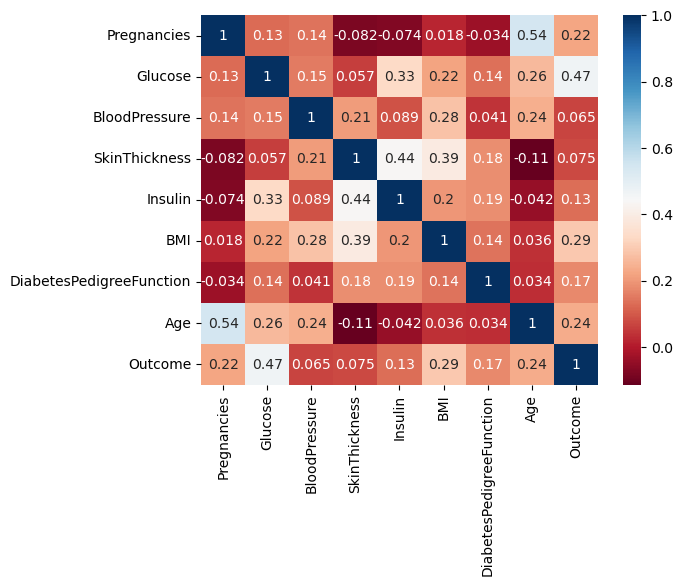

In [13]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.show()

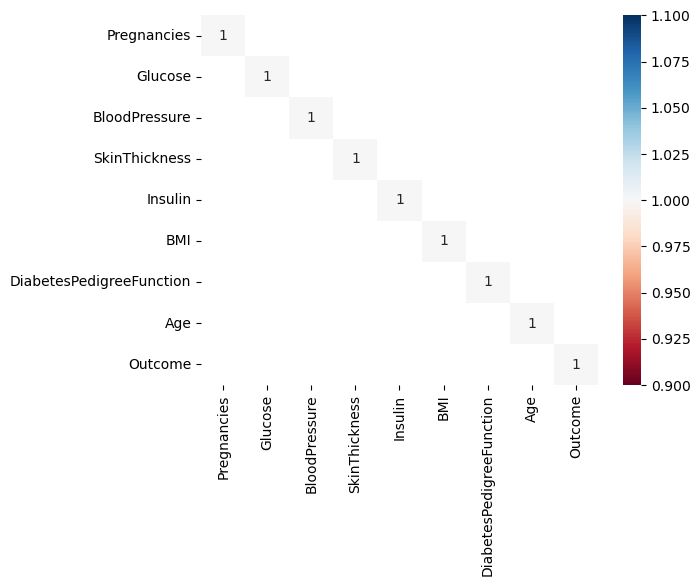

In [14]:
sns.heatmap(corr[abs(corr>=0.7)], annot=True, cmap='RdBu')
plt.show()

#### From about correlation we can see that non of the independent features have high correlation 

### Outlier Treatment 
#### 1. Dropping the outliers 

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print('Q1')
print(Q1)
print('*'*40)
print('Q3')
print(Q3)
print('*'*40)
print('IQR')
print(IQR)

Q1
Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64
****************************************
Q3
Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64
****************************************
IQR
Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127

In [16]:
mn = Q1-1.5*IQR
mx = Q3+1.5*IQR
print('Minimum')
print(mn)
print('*'*40)
print('Maximum')
print(mx)

Minimum
Pregnancies                  -6.500
Glucose                      37.125
BloodPressure                35.000
SkinThickness               -48.000
Insulin                    -190.875
BMI                          13.350
DiabetesPedigreeFunction     -0.330
Age                          -1.500
Outcome                      -1.500
dtype: float64
****************************************
Maximum
Pregnancies                  13.500
Glucose                     202.125
BloodPressure               107.000
SkinThickness                80.000
Insulin                     318.125
BMI                          50.550
DiabetesPedigreeFunction      1.200
Age                          66.500
Outcome                       2.500
dtype: float64


In [17]:
new_df = df[~((df<mn)|(df>mx)).any(axis=1)]

In [18]:
print(df.shape)
print(new_df.shape)

(768, 9)
(639, 9)


#### 2. Clipping the outliers 

In [19]:
df.describe(percentiles= [0.01,0.02,0.03,0.04,0.05]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,0.00000,0.000,0.00000,3.0000,17.00
Glucose,768.0,120.894531,31.972618,0.000,57.00000,69.02000,73.01000,76.000,79.00000,117.0000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,0.00000,0.00000,0.000,38.70000,72.0000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,0.00000,0.000,0.00000,23.0000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,0.00000,0.000,0.00000,30.5000,846.00
BMI,768.0,31.992578,7.884160,0.000,0.00000,19.16800,19.90100,21.000,21.80000,32.0000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.11902,0.12701,0.134,0.14035,0.3725,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,21.00000,21.000,21.00000,29.0000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.0000,1.00


In [20]:
print(df[df['Glucose']<69.02000].shape) # 2%
print(df[df['BloodPressure']<38.70000].shape)  #5%
print(df[df['BMI']<19.16800].shape)   # 2%

(16, 9)
(39, 9)
(16, 9)


In [21]:
df.describe(percentiles= [0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,3.0000,10.00000,11.00000,11.00000,12.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,117.0000,181.00000,184.00000,187.99000,192.32000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,72.0000,90.00000,92.00000,94.99000,99.32000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,23.0000,44.00000,45.32000,46.00000,48.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,30.5000,293.00000,325.00000,369.90000,470.94000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,32.0000,44.39500,45.33200,46.10000,47.52600,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.3725,1.13285,1.18424,1.25793,1.39066,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,29.0000,58.00000,60.00000,62.00000,64.66000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00


In [22]:
print(df[df['Pregnancies']>13].shape)   # 99%
print(df[df['Glucose']>196.00000].shape)   # 99%
print(df[df['BloodPressure']>106].shape)   # 99%
print(df[df['SkinThickness']>51.33].shape)   # 99%
print(df[df['Insulin']>369.9].shape)   # 97%
print(df[df['BMI']>50.759].shape)   # 99%
print(df[df['DiabetesPedigreeFunction']>1.25793].shape)   # 99%
print(df[df['Age']>67].shape)   # 99%

(4, 9)
(6, 9)
(7, 9)
(8, 9)
(24, 9)
(8, 9)
(24, 9)
(6, 9)


In [23]:
def clip_out_low(x):
    x = x.clip(lower= x.quantile(0.05))
    return x
    
def clip_out_up(x):
    x = x.clip(upper= x.quantile(0.97))
    return x

In [24]:
up_outlier = df.columns[:-1]
low_outlier = ['Glucose', 'BloodPressure','BMI']

print(up_outlier)
print(low_outlier)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
['Glucose', 'BloodPressure', 'BMI']


In [25]:
df[up_outlier] = df[up_outlier].apply(clip_out_up)
df[low_outlier] = df[low_outlier].apply(clip_out_low)

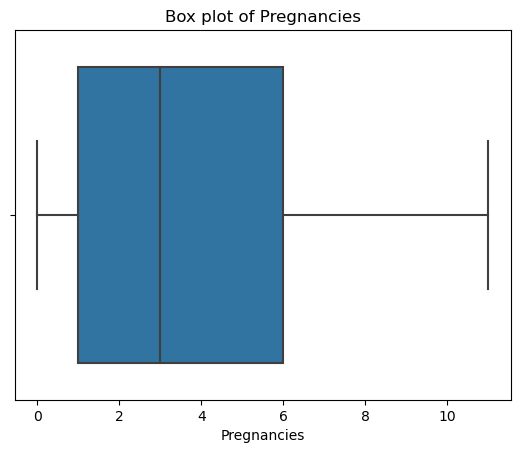

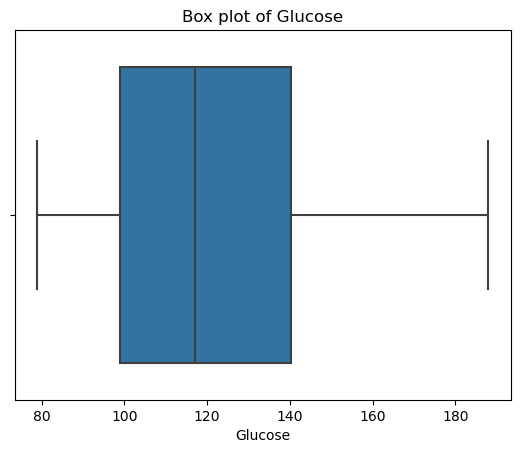

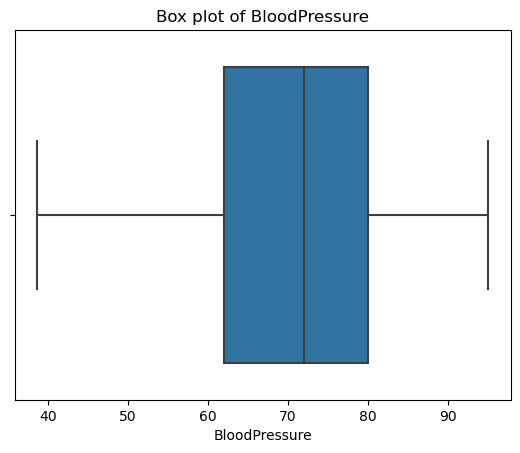

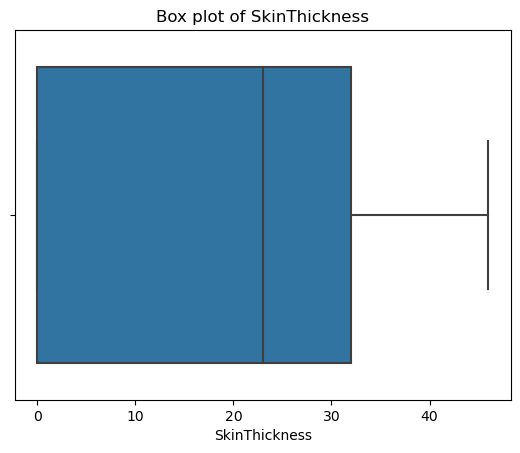

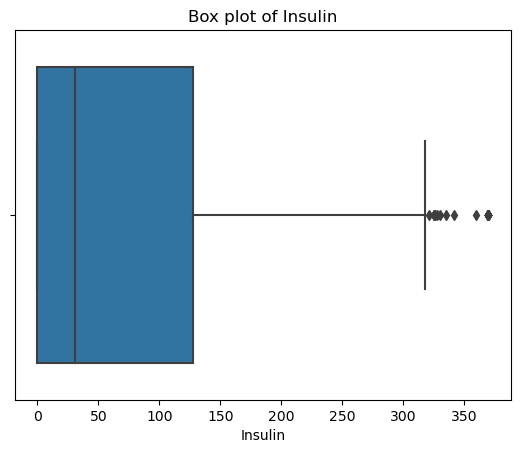

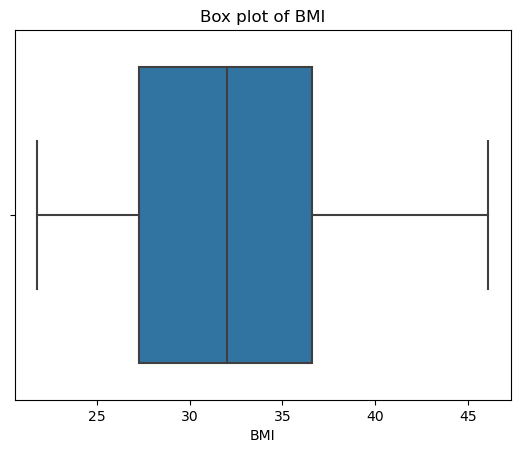

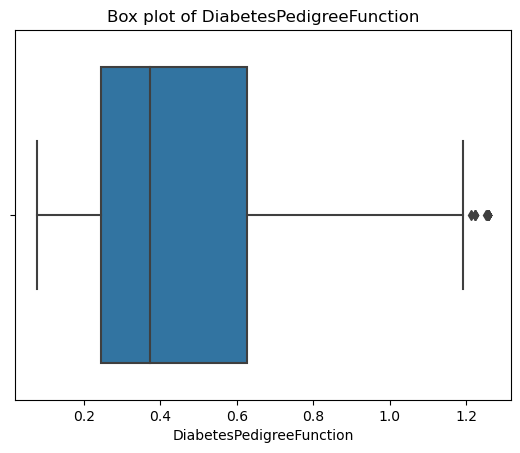

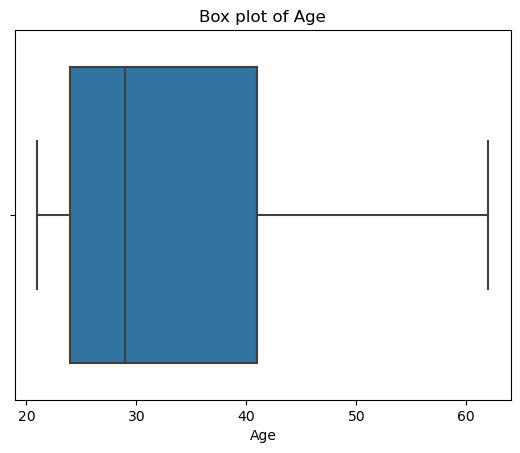

In [26]:
for i in df.columns[:-1]:
    sns.boxplot(x= df[i])
    plt.title(f"Box plot of {i}")
    plt.show()

#### Selecting x and y

#### 1. For data where outliers was removed 

In [27]:
X = new_df.drop('Outcome', axis=1)
Y = new_df['Outcome']

#### 2. For data where outliers was clipped

In [28]:
x = df.iloc[:,:-1]
y = df['Outcome']

#### Splitting the data into train and test

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# for 1st condition 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(447, 8)
(447,)
(192, 8)
(192,)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
# Creating UDF for Model evaluation 

def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

### Logistic Regression Model
#### 1. Using data of removed outliers new_df

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [36]:
print('Train Score', lr.score(X_train,Y_train))
print('Test Score', lr.score(X_test,Y_test))

Train Score 0.785234899328859
Test Score 0.796875


In [37]:
Ypred = lr.predict(X_test)
print(Ypred)

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0]


In [38]:
eval_model(Y_test,Ypred)

[[125   7]
 [ 32  28]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       132
           1       0.80      0.47      0.59        60

    accuracy                           0.80       192
   macro avg       0.80      0.71      0.73       192
weighted avg       0.80      0.80      0.78       192



In [39]:
from sklearn.metrics import roc_auc_score, roc_curve

In [40]:
res = lr.predict_proba(X_test)
print(res[:5])

[[0.91809157 0.08190843]
 [0.91907203 0.08092797]
 [0.8005078  0.1994922 ]
 [0.19275343 0.80724657]
 [0.53271077 0.46728923]]


AUC Score: 0.8587121212121211


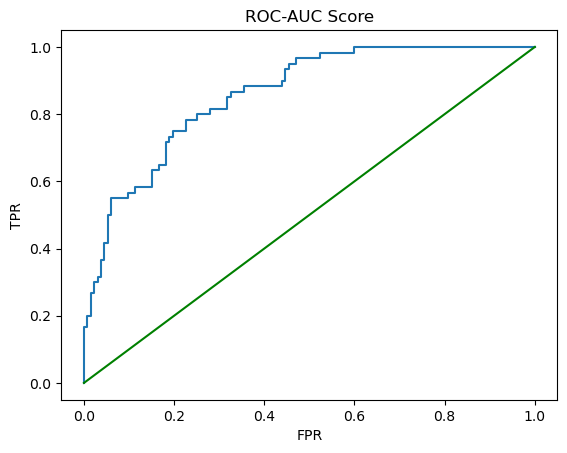

In [41]:
FPR, TPR, Thresh = roc_curve(Y_test, res[:,1])
AUC_scr = roc_auc_score(Y_test, res[:,1])
print('AUC Score:', AUC_scr)

plt.plot(FPR,TPR)
plt.plot([0,1],[0,1], color='green')
plt.title("ROC-AUC Score")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [42]:
INDEX = np.argmax(TPR * (1-FPR))
print(INDEX)
print(Thresh[34])

34
0.26728806743167444


#### 2. Using data of clipped outliers

In [43]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [44]:
print('Train Score', lr1.score(x_train,y_train))
print('Test Score', lr1.score(x_test,y_test))

Train Score 0.7839851024208566
Test Score 0.7445887445887446


In [45]:
ypred = lr.predict(x_test)
print(ypred)

[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0]


In [46]:
eval_model(y_test,ypred)

[[132  19]
 [ 33  47]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       151
           1       0.71      0.59      0.64        80

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [47]:
res1 = lr1.predict_proba(x_test)
print(res[:5])

[[0.91809157 0.08190843]
 [0.91907203 0.08092797]
 [0.8005078  0.1994922 ]
 [0.19275343 0.80724657]
 [0.53271077 0.46728923]]


AUC Score: 0.8029801324503312


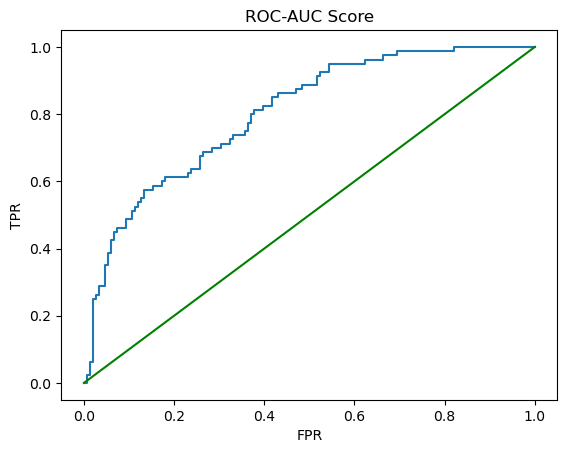

In [48]:
fpr, tpr, thresh = roc_curve(y_test, res1[:,1])
auc_scr = roc_auc_score(y_test, res1[:,1])
print('AUC Score:', auc_scr)

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], color='green')
plt.title("ROC-AUC Score")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [49]:
index = np.argmax(tpr * (1-fpr))
print(index)
print(thresh[62])

62
0.25659043356675465
